In [130]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

## Base line locomotion

In [5]:
#parameters
dt = 0.6  #seconds
v_m = 0.12  #mm/s
v_s = 0.01  #std of speed
th_m = 0  #mean curving is zero
th_s = 32.3  #degrees/mm
th_cor = 12  #12 seconds helf-time

In [93]:
#Autocorrelation function
def autocorr(x):
    result = np.correlate(x, x, 'full')
    result = result[int(result.size/2):]
    return result/result[0]

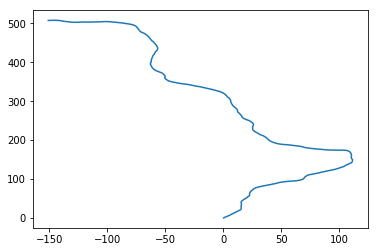

In [264]:
# initialize space-time
T = 10000
time = np.arange(0,T*dt,dt)
xs = np.zeros(time.shape)
ys = np.zeros(time.shape)  #2D location
xs[0] = np.random.rand()
ys[0] = np.random.rand()
ths = np.zeros(time.shape)  #agle with 1,0
ths[0] = np.random.rand()*0

#without turning (OU-like tragectories)
for t in range(1,len(time)):
    vv = v_m + v_s*np.random.randn()
    ths[t] = ths[t-1] + (th_m)*dt + (th_s*(vv*dt)*np.random.randn()) *dt**0.5  #OU process? (- ths[t-1]/th_cor + )
    
    e1 = np.array([1,0])
    vec = np.array([xs[t-1],ys[t-1]])
    theta = math.acos(np.clip(np.dot(vec,e1)/np.linalg.norm(vec)/np.linalg.norm(e1), -1, 1)) #current orienation relative to (1,0)
    
    dd = np.array([vv*np.sin(ths[t-1]*np.pi/180), vv*np.cos(ths[t-1]*np.pi/180)])  #displacement
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,s), (-s, c)))  #rotation matrix, changing coordinates
    dxy = np.dot(R,dd)
                             
    xs[t] = xs[t-1] + dxy[0] *dt
    ys[t] = ys[t-1] + dxy[1] *dt
    
plt.plot(xs,ys)

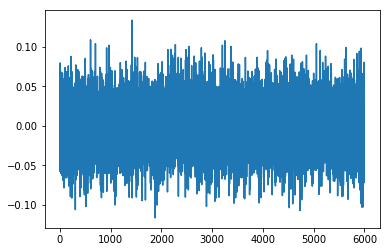

In [267]:
plt.plot(time[:-1],np.diff(ths)*np.pi/180)

Text(0,0.5,'autocorr')

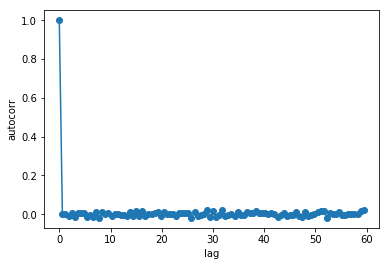

In [266]:
#plt.plot(np.arange(0,len(autocorr(ths))*dt,dt),autocorr(ths))
dth = np.diff(ths)
lag = np.arange(0,len(autocorr(dth))*dt,dt)
plt.plot(lag[0:100],autocorr(dth)[0:100],'-o')
plt.xlabel('lag')
plt.ylabel('autocorr')

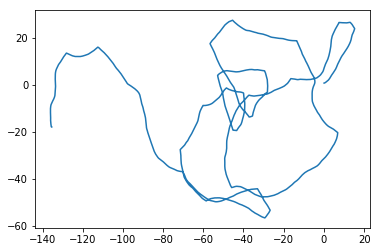

In [324]:
#with turning (switching-state)
T = 10000
time = np.arange(0,T*dt,dt)
xs = np.zeros(time.shape)
ys = np.zeros(time.shape)  #2D location
xs[0] = np.random.rand()
ys[0] = np.random.rand()
ths = np.zeros(time.shape)  #agle with 1,0
ths[0] = np.random.rand()*0

event_rate = 0.01
turn_m = 100

#without turning (OU-like tragectories)
for t in range(1,len(time)):
    vv = v_m + v_s*np.random.randn()
    ths[t] = ths[t-1] + (th_m)*dt + (th_s*(vv*dt)*np.random.randn()) *dt**0.5  #OU process? (- ths[t-1]/th_cor + )
    ##turns
    if np.random.poisson(event_rate/(1/dt), 1) == 1:  #Poisson rate (per second)
        ths[t] = ths[t-1] + (np.random.randint(2)-1)*(turn_m)*dt + (th_s*(vv*dt)*np.random.randn()) *dt**0.5
    
    e1 = np.array([1,0])
    vec = np.array([xs[t-1],ys[t-1]])
    theta = math.acos(np.clip(np.dot(vec,e1)/np.linalg.norm(vec)/np.linalg.norm(e1), -1, 1)) #current orienation relative to (1,0)
    
    dd = np.array([vv*np.sin(ths[t-1]*np.pi/180), vv*np.cos(ths[t-1]*np.pi/180)])  #displacement
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,s), (-s, c)))  #rotation matrix, changing coordinates
    dxy = np.dot(R,dd)
                             
    xs[t] = xs[t-1] + dxy[0] *dt
    ys[t] = ys[t-1] + dxy[1] *dt
    
plt.plot(xs,ys)

## Gradient environment

In [325]:
#gradient environment
dis2targ = 300
def gradient(C0,x,y):
    concentration = C0*np.exp(-0.5*(x-dis2targ)**2)
    return concentration

In [ ]:
def sharp_turn_function(concentration):
    
    return event

In [ ]:
def bear_function(concentration):
    return turn_rate

In [ ]:
import numpy.random as npr
from pyslds.models import DefaultSLDS

K = 5               # Number of discrete latent states
D_obs = 1           # Observed data dimension
D_latent = 2        # Latent state dimension
D_input = 0         # Exogenous input dimension
T = 2000            # Number of time steps to simulate

true_model = DefaultSLDS(K, D_obs, D_latent, D_input)
inputs = npr.randn(T, D_input)
y, x, z = true_model.generate(T, inputs=inputs)

# Compute the log likelihood of the data with the true params
true_ll = true_model.log_likelihood() 